1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import pandas as pd
import scipy 

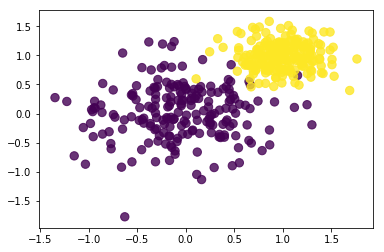

In [2]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

Text(0, 0.5, 'Y')

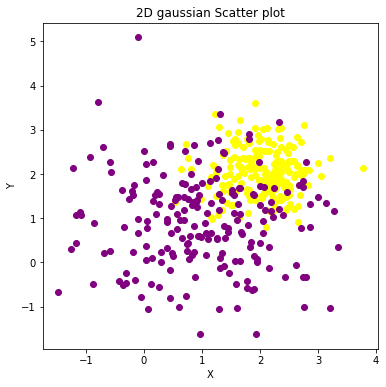

In [3]:
#Function that makes data
def make_data(numbers,mean,deviation):
    result=np.random.normal(mean,deviation,(numbers,2))
    return result
    

# Making data for X and y using the function
X=make_data(200,2,0.5)
Y=make_data(200,1,1.0)

#Plotting the results
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0],X[:,1],c="yellow")
ax.scatter(Y[:,0],Y[:,1],c="purple")
ax.set_title('2D gaussian Scatter plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


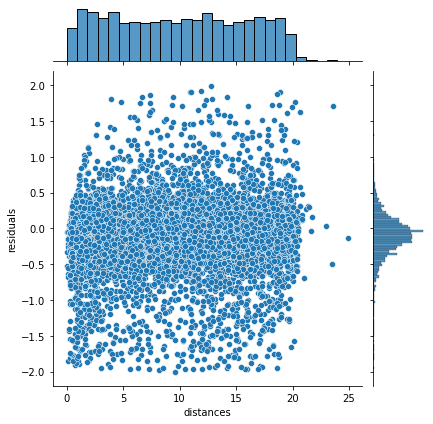

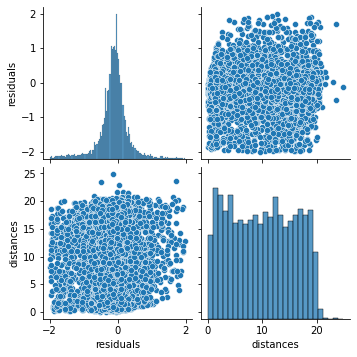

In [4]:
#1st part
infile = open('./data/residuals_261.pkl', 'rb')
pick = pickle.load(infile)
infile.close()

#Converting to dataframe
dataf = pd.DataFrame(pick.tolist())
display(dataf)

#Cleaning the sample
data_residu=dataf[abs(dataf['residuals'])<2.0]
display(data_residu)

#plotting
sns.jointplot(x="distances", y="residuals", data=data_residu)

#For the correlation between the variables
sns.pairplot(data_residu)

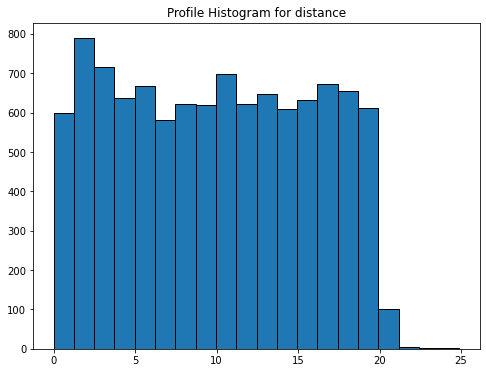

the x is:
 [ 0.6225  1.8675  3.1125  4.3575  5.6025  6.8475  8.0925  9.3375 10.5825
 11.8275 13.0725 14.3175 15.5625 16.8075 18.0525 19.2975 20.5425 21.7875
 23.0325 24.2775]

 the y is:
 BINS
1    -0.202987
2    -0.163470
3    -0.160586
4    -0.134578
5    -0.134487
6    -0.096008
7    -0.092843
8    -0.088227
9    -0.059165
10   -0.080390
11   -0.110163
12   -0.149770
13   -0.137967
14   -0.150486
15   -0.138541
16   -0.070728
17    0.051143
18    0.201333
19    0.412857
21   -0.128571
Name: residuals, dtype: float64

 the err_y is:
 BINS
1     0.469067
2     0.420933
3     0.405109
4     0.415232
5     0.412550
6     0.471276
7     0.416103
8     0.413838
9     0.462521
10    0.467644
11    0.493068
12    0.448587
13    0.470547
14    0.417632
15    0.411321
16    0.383527
17    0.495440
18    0.144079
19    1.154028
21         NaN
Name: residuals, dtype: float64


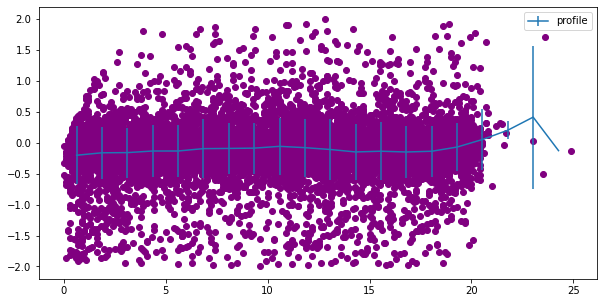

In [8]:
#2nd part
fig,ax=plt.subplots(figsize=(8,6))
histogram, bin_list, value = plt.hist(data_residu['distances'], bins=20,edgecolor = "black")
#After testing with many bins, bins=20 obtains the best result
plt.title("Profile Histogram for distance")
plt.show()

#getting the means and standar deviations is easier with a panda dataframe
searching_y =data_residu.loc[:, ['residuals','distances']]

#center of bins = (bins[:-1] + bins[1:]) / 2
x = (bin_list[:-1] + bin_list[1:])/2
searching_y['BINS'] = np.digitize(searching_y['distances'], bins=bin_list)

y = searching_y.groupby('BINS')['residuals'].mean()
err_y = searching_y.groupby('BINS')['residuals'].std()

print("the x is:\n",x)
print("\n the y is:\n",y)
print("\n the err_y is:\n",err_y)

#plotting the profile plot on top of the scatterplot
plt.subplots(figsize=(10,5))
plt.scatter(searching_y['distances'], searching_y['residuals'], c='purple')
plt.errorbar(x, y, err_y, label='profile')
plt.legend()



3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


Text(0, 0.5, 'Counts')

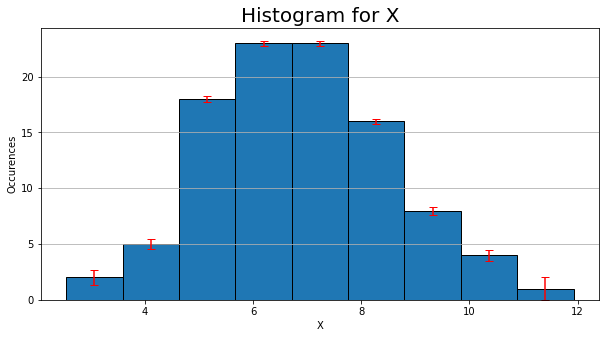

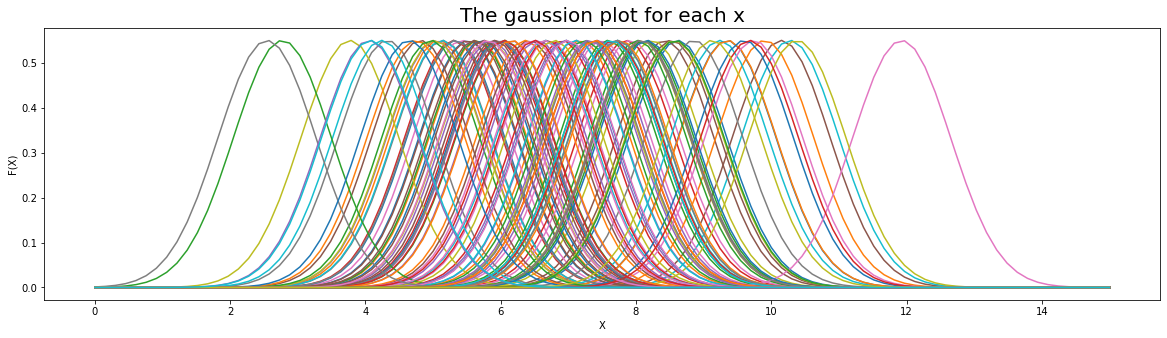

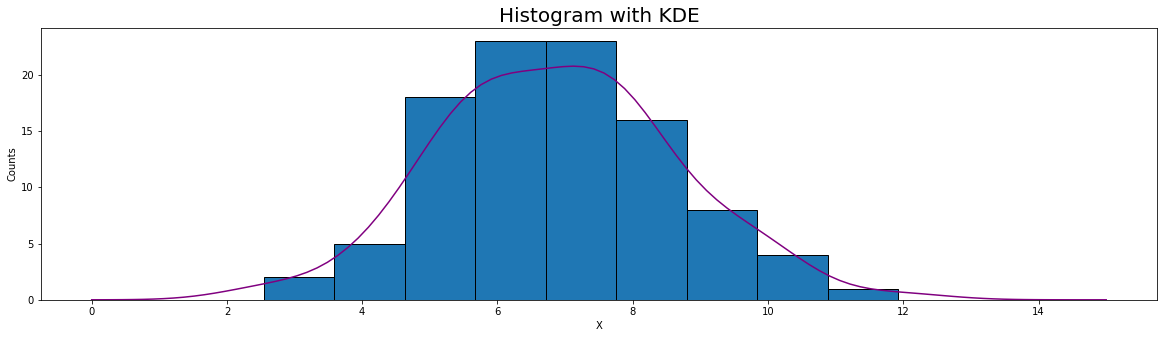

In [7]:
#For the 1st figure
mean = 7
deviation = 1.5
N = 100
x = np.random.normal(mean, deviation, N)

fig, plotting1 = plt.subplots(figsize=(10,5))
hist,bin_list,_ = plotting1.hist(x,bins=9,edgecolor = "black")
center = (bin_list[:-1] + bin_list[1:]) /2.0
error = 1/np.sqrt(hist)
plotting1.errorbar(center, hist, error, fmt='none', c='red',capsize=4)
#for the aesthetic
plotting1.set_title('Histogram for X', fontsize=20)
plotting1.set_xlabel('X')
plotting1.set_ylabel('Occurences')
plotting1.yaxis.grid()
   
#for 2nd figure
fig2, plotting2 = plt.subplots(figsize=(20,5))
Standar_dev2 = 1.06 * np.std(x) * (len(x)**(-1/5))
the_sums = np.zeros((N,))
bin_space = np.linspace(0, 15, N)
kde_list=[]
for nums in x:
    pdf = scipy.stats.norm.pdf(bin_space, nums, Standar_dev2)
    the_sums = the_sums + pdf
    plotting2.plot(bin_space, pdf)
    kde_list.append(scipy.stats.norm.pdf(bin_space, nums, Standar_dev2))
#for the aesthetic
plotting2.set_title('The gaussion plot for each x', fontsize=20)
plotting2.set_xlabel('X')
plotting2.set_ylabel('F(X)')    
    
# for 3rd figure
complete_kde=np.sum(kde_list, axis=0)
fig3,plotting3 = plt.subplots(figsize = (20,5))
plotting3.hist(x,9,edgecolor = "black")
plotting3.plot(bin_space, complete_kde, color='purple')
#for the aesthetic
plotting3.set_title('Histogram with KDE', fontsize=20)
plotting3.set_xlabel('X')
plotting3.set_ylabel('Counts')